# Create image out of Circles

## Util

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
def objective_function(vec,out, img):
    shapes, t = np.copy(out), np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    t = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)
    return np.sum(np.abs(np.subtract(img, t))) 

In [12]:
def draw_circle(vec, out, p = False):
    shapes = np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (int(vec[3]), int(vec[4]), int(vec[5])), cv2.FILLED)
    out = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)
    if p: plt.imshow(out), plt.show()
    return out

### Make Animation

In [13]:
def createAnimation(data):
    import matplotlib.animation as animation
    import time

    fig = plt.figure()

    def animate(frame_number):
        global imageToAnimate
        imageToAnimate = draw_circle(data[frame_number], imageToAnimate)
        plt.imshow(imageToAnimate)

    global imageToAnimate
    imageToAnimate = np.zeros(img.shape, np.uint8)
    plt.imshow(imageToAnimate)
    anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=5)

    f = str(int(time.time())) + ".gif"
    writervideo = animation.PillowWriter(fps=60)
    anim.save(f, writer=writervideo)

## Our Differential Evolution

In [14]:
def executeOurs(img, objectiveFunction, bounds, nIter = 30, cR = 0.5, popSize = 25, nMax = 300, animate = False, display = 5):
    from differential_evolution import differential_evolution
    out = np.zeros_like(img)
    data = np.zeros((nIter, len(bounds)))
    lastFitness = 100000000
    for i in range(nIter):
        r = differential_evolution(objectiveFunction, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = nMax)
        if r['fun'] > lastFitness: continue
        if animate: data[i] = r["P"]
        if i % (nIter // np.min((nIter, display))): 
            out = draw_circle(r["P"], out)
        else:
            print(i, r)
            out = draw_circle(r["P"], out, True)
        lastFitness = r['fun']
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(out) 
    if animate: createAnimation(data)

## Scipy Differential Evolution

In [15]:
def executeTheirs(img, objectiveFunction, bounds, nIter = 30, cR = 0.5, popSize = 25, nMax = 300, animate = False, display = 5):
    from scipy.optimize import differential_evolution
    out = np.zeros_like(img)
    data = np.zeros((nIter, len(bounds)))
    lastFitness = 100000000
    for i in range(nIter):
        r = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize = popSize, maxiter = nMax)
        if r.fun > lastFitness: continue
        if animate: data[i] = r.x
        if i % (nIter // np.min((nIter, display))): out = draw_circle(r.x, out)
        else:
            print(i, r)
            out = draw_circle(r.x, out, True)
        lastFitness = r.fun
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(out) 
    if animate: createAnimation(data)

## Execution

In [16]:
nIter, cR, popSize, nMax = 300, 0.60, 50, 750

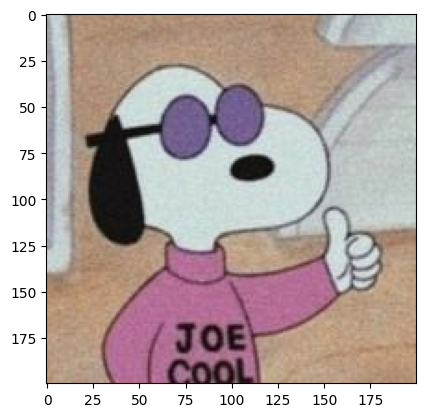

In [17]:
img = cv2.cvtColor(cv2.imread("../data/JoeCool.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [1, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

0 {'P': array([100.23939378,  92.69122473, 100.        , 251.82944748,
       150.66068385, 178.36369474,   0.6219515 ]), 'nIt': 386, 'fun': 11240683, 'nFev': 19350}


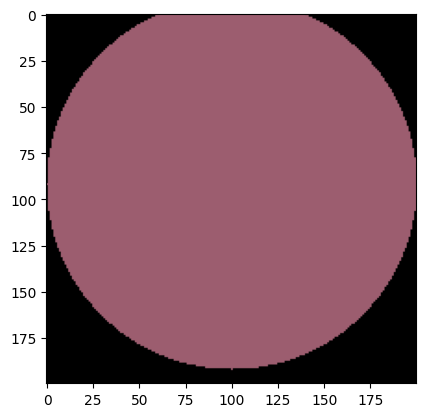

60 {'P': array([135.77422499, 167.33482766,   4.23403513,  35.60894227,
         9.27859182,   1.41391404,   0.47188225]), 'nIt': 529, 'fun': 4395042, 'nFev': 26500}


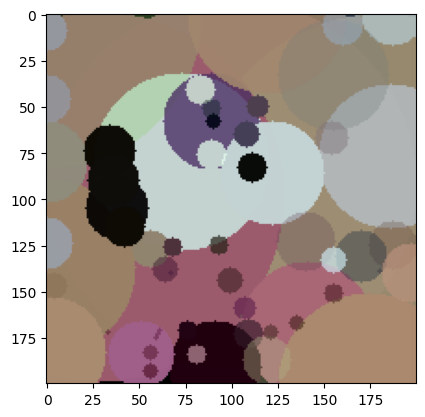

120 {'P': array([140.0983417 , 135.23947585,   1.        ,  51.87972616,
         9.45219899,   1.42279153,   0.47505627]), 'nIt': 495, 'fun': 3915008, 'nFev': 24800}


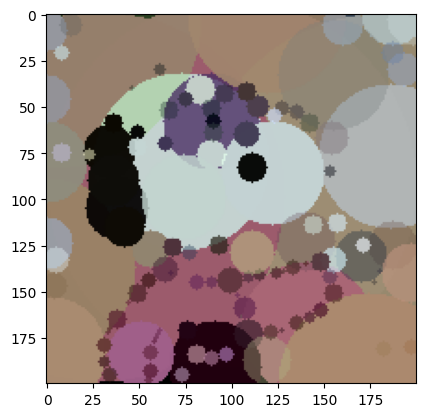

180 {'P': array([151.50411133,  95.76707906,   2.65929555,  91.57754757,
        98.07069927, 103.40140814,   0.93261427]), 'nIt': 657, 'fun': 3581649, 'nFev': 32900}


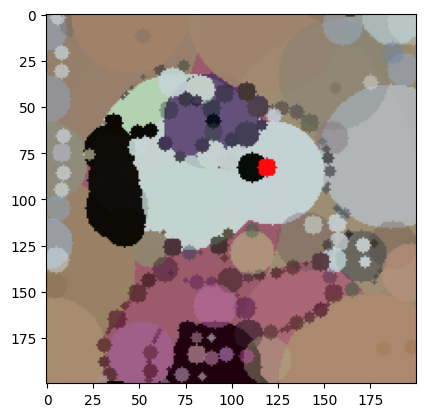

240 {'P': array([ 76.49794078,  79.32929191,   1.03191081,  97.41540674,
        66.17716064, 112.7283896 ,   0.3001461 ]), 'nIt': 164, 'fun': 3360144, 'nFev': 8250}


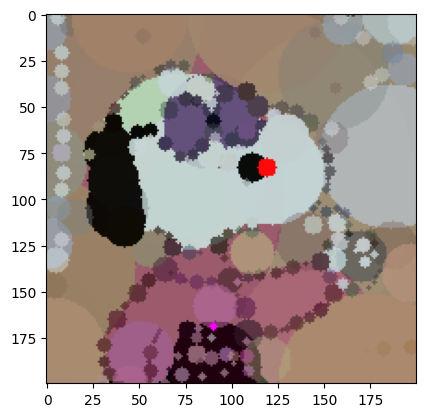

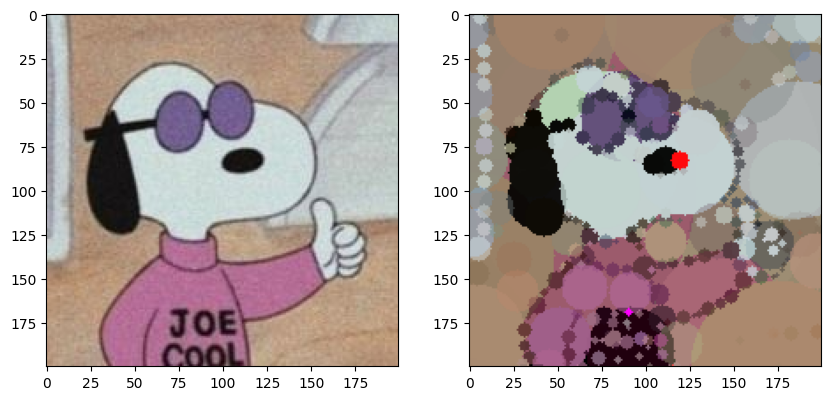

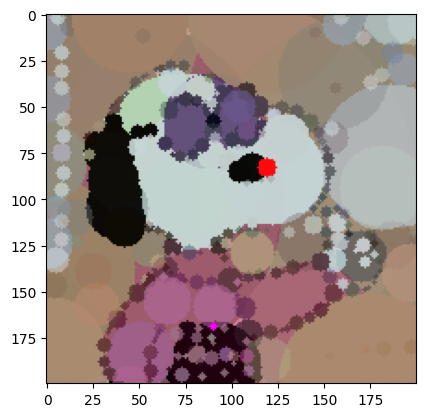

In [18]:
executeOurs(img, objective_function, bounds, nIter, cR, popSize, nMax, True, 5)

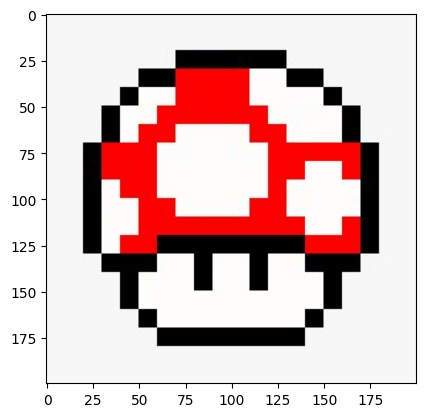

In [19]:
img = cv2.cvtColor(cv2.imread("../data/Mushroom.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [5, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.7, 1],           # alpha
]

0 {'P': array([ 99.3838591 , 100.52332908, 100.        , 255.        ,
       254.61943747, 255.        ,   0.96001166]), 'nIt': 105, 'fun': 7684239, 'nFev': 5300}


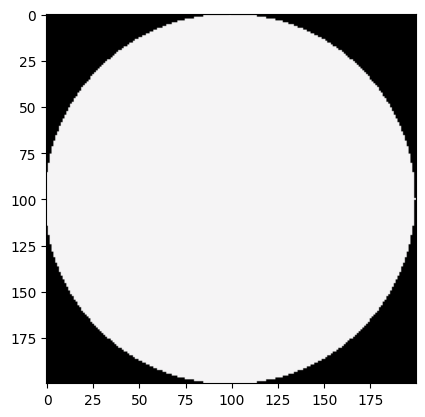

60 {'P': array([ 47.61234264,  82.31808721,  12.32017418, 246.13244911,
         0.        ,   0.        ,   0.99991301]), 'nIt': 376, 'fun': 905838, 'nFev': 18850}


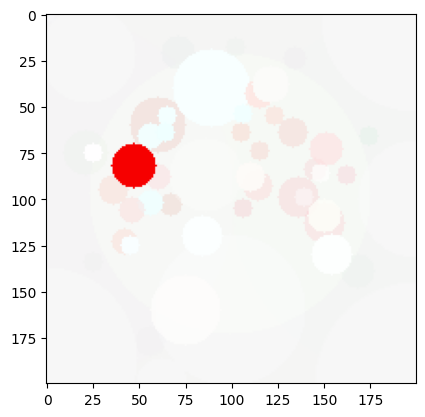

120 {'P': array([200.        ,  39.66477657,  31.14733786, 247.95421573,
       248.23898021, 247.77659535,   0.43672233]), 'nIt': 323, 'fun': 782870, 'nFev': 16200}


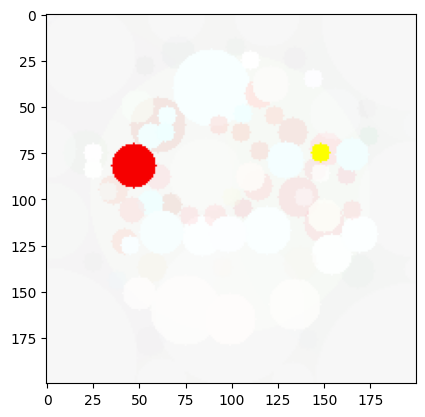

180 {'P': array([200.        , 200.        ,   5.05969794, 246.75509232,
       246.65928026, 245.62763079,   0.34743951]), 'nIt': 80, 'fun': 718407, 'nFev': 4050}


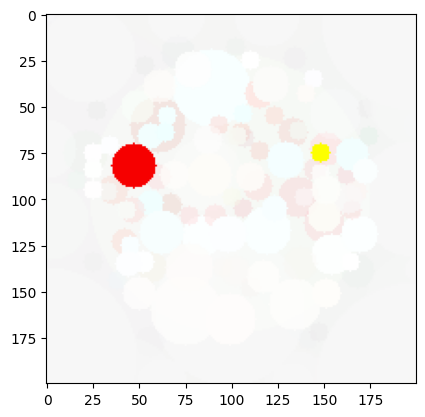

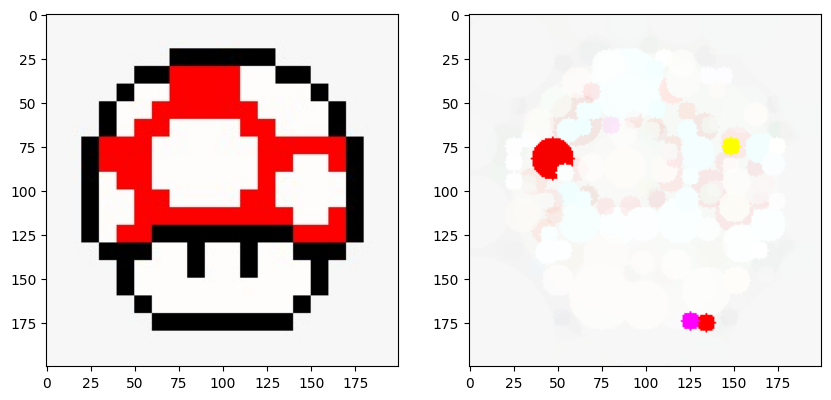

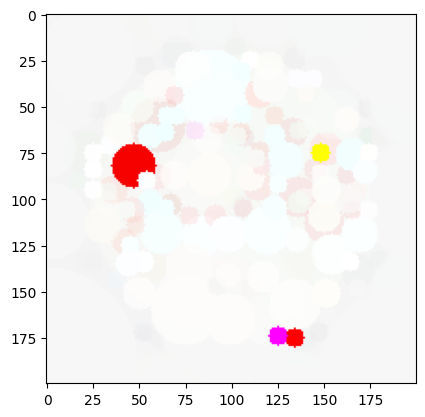

In [20]:
executeOurs(img, objective_function, bounds, nIter, cR, popSize, nMax, True, 5)

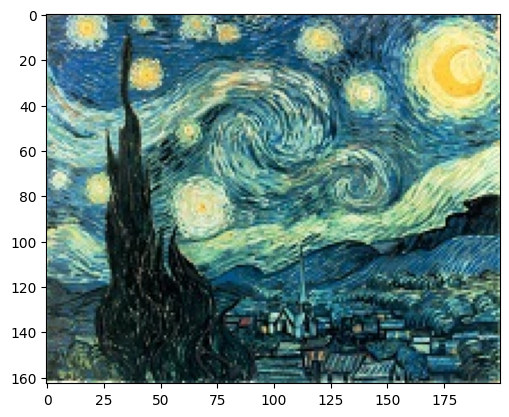

In [21]:
img = cv2.cvtColor(cv2.imread("../data/StarryNight.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [1, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

0 {'P': array([111.87499121,  22.74958816,  90.        ,  37.99510202,
       206.56620777, 239.81675266,   0.34435233]), 'nIt': 240, 'fun': 8332243, 'nFev': 12050}


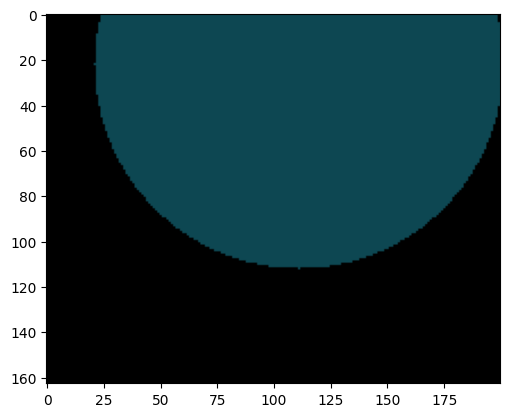

60 {'P': array([122.12718984,   9.1346145 ,   7.3426724 , 231.83847913,
       222.85515698, 101.75681506,   0.30447637]), 'nIt': 750, 'fun': 5727099, 'nFev': 37550}


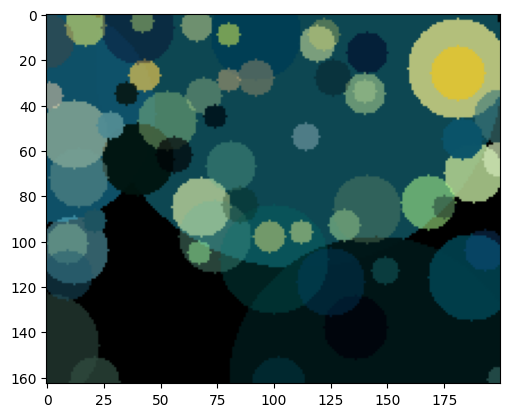

120 {'P': array([140.00236731,  94.04368026,   6.44901426,  90.45109134,
       165.16024491, 124.0661506 ,   0.70428827]), 'nIt': 750, 'fun': 5367014, 'nFev': 37550}


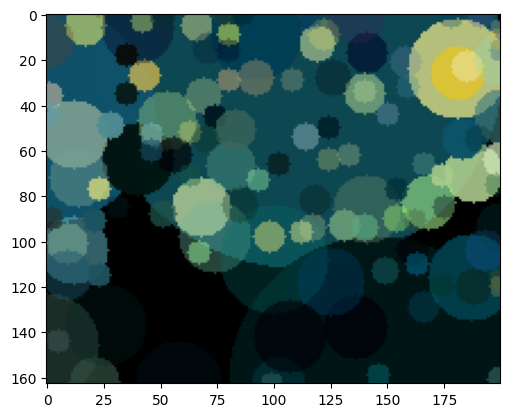

180 {'P': array([103.58880146,  43.0587913 ,   5.18319546,   0.13067564,
        21.13046085,   0.        ,   0.31098159]), 'nIt': 274, 'fun': 5118949, 'nFev': 13750}


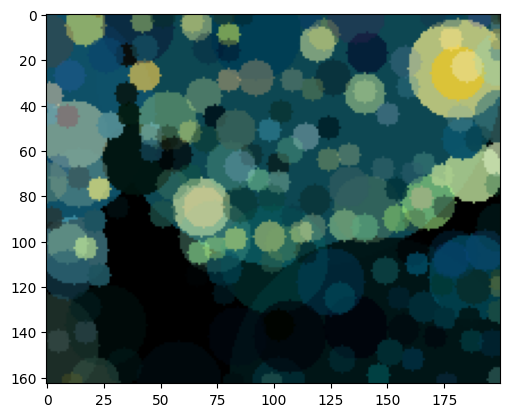

240 {'P': array([182.37345435, 153.31666194,   5.00101814,   8.56665805,
        46.47923005,  56.98589541,   0.41649068]), 'nIt': 558, 'fun': 4955898, 'nFev': 27950}


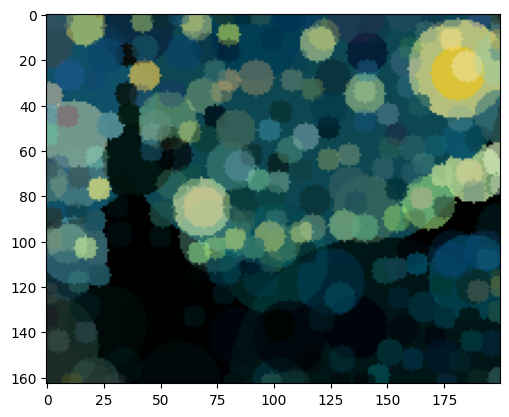

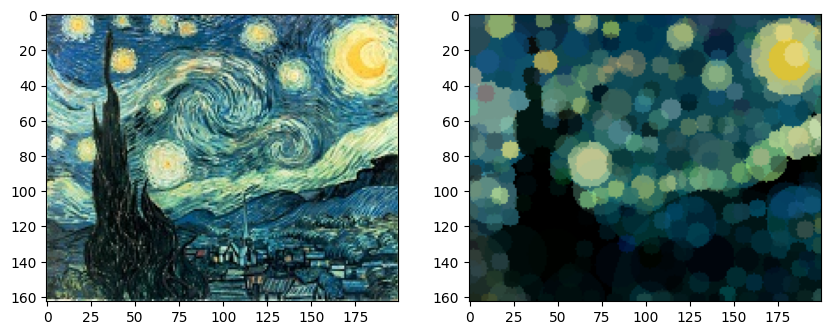

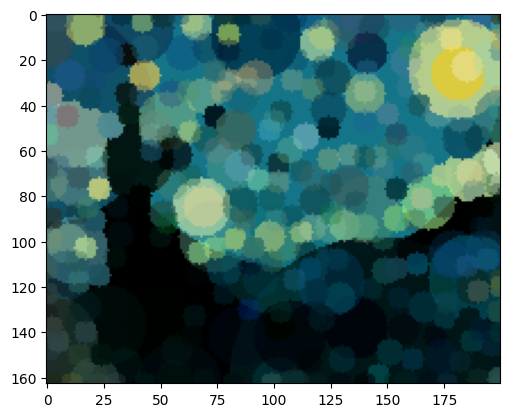

In [22]:
executeOurs(img, objective_function, bounds, nIter, cR, popSize, nMax, True, 5)

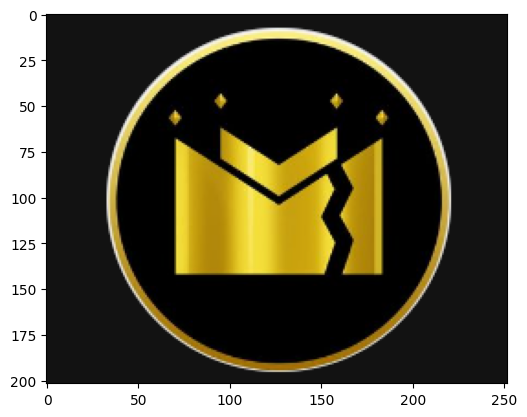

In [23]:
img = cv2.cvtColor(cv2.imread("../data/Imperfectus.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [1, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

0 {'P': array([113.65938548, 108.63646186,  44.60179715, 254.404666  ,
       194.97459944,   0.        ,   0.6934625 ]), 'nIt': 305, 'fun': 4604699, 'nFev': 22950}


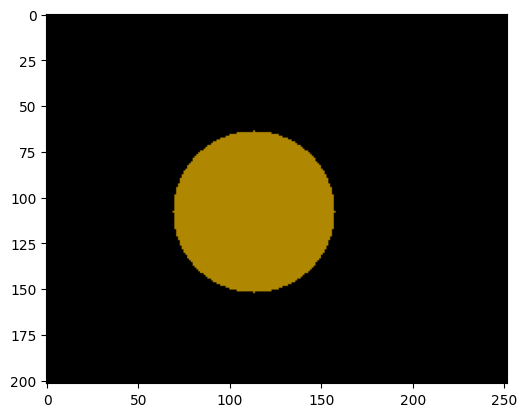

200 {'P': array([252.        , 202.        ,   5.35775934,  17.42628627,
        20.99771364,  17.51750821,   0.3       ]), 'nIt': 95, 'fun': 1835626, 'nFev': 7200}


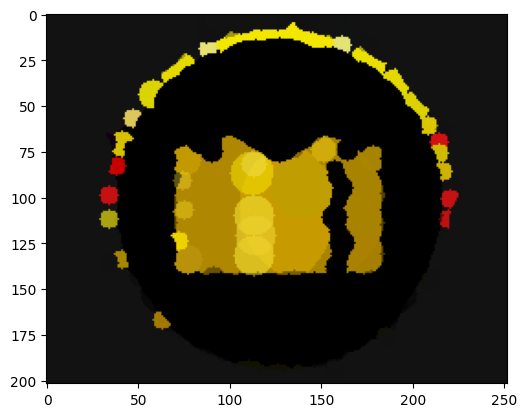

400 {'P': array([113.94114132, 135.63534202,   7.00712716, 251.31345127,
       235.09384077,  73.67282382,   0.48251709]), 'nIt': 750, 'fun': 1711392, 'nFev': 56325}


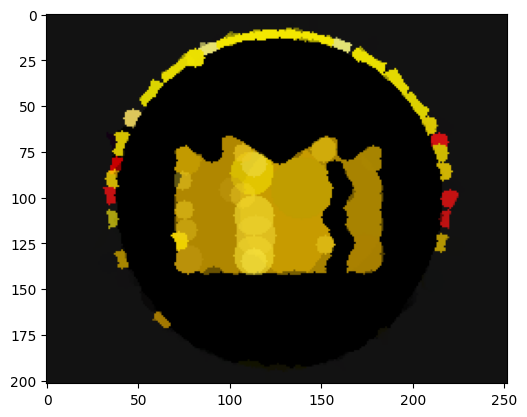

KeyboardInterrupt: 

In [24]:
executeOurs(img, objective_function, bounds, nIter + 700, cR, popSize + 25, nMax, True, 5)

In [ ]:
img = cv2.cvtColor(cv2.imread("../data/BiggerMonaLisa.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [1, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

In [ ]:
executeOurs(img, objective_function, bounds, nIter, cR, popSize, nMax, True, 5)

In [ ]:
executeTheirs(img, objective_function, bounds, nIter, cR, popSize, nMax, False, 5)